In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import uproot

In [3]:
dfsData = []
dfsDataLite = []
with uproot.open('/home/mdicosta/LocalTestsO2/dplustree/mc_corrbkgs_oldcode/AO2D.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfcanddplite' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")

['DF_2336518079279519;1', 'DF_2336518079279519/O2hfcanddplite;1', 'DF_2336518079463007;1', 'DF_2336518079463007/O2hfcanddplite;1', 'DF_2336518079463039;1', 'DF_2336518079463039/O2hfcanddplite;1', 'DF_2336518079646559;1', 'DF_2336518079646559/O2hfcanddplite;1', 'DF_2336518079830111;1', 'DF_2336518079830111/O2hfcanddplite;1', 'DF_2336518080013663;1', 'DF_2336518080013663/O2hfcanddplite;1', 'DF_2336518080013695;1', 'DF_2336518080013695/O2hfcanddplite;1', 'DF_2336518080197151;1', 'DF_2336518080197151/O2hfcanddplite;1', 'DF_2336518080380703;1', 'DF_2336518080380703/O2hfcanddplite;1', 'DF_2336518080564255;1', 'DF_2336518080564255/O2hfcanddplite;1', 'DF_2336518080747807;1', 'DF_2336518080747807/O2hfcanddplite;1', 'DF_2336518080931295;1', 'DF_2336518080931295/O2hfcanddplite;1', 'DF_2336518080931327;1', 'DF_2336518080931327/O2hfcanddplite;1', 'DF_2336518081114847;1', 'DF_2336518081114847/O2hfcanddplite;1', 'DF_2336518081298399;1', 'DF_2336518081298399/O2hfcanddplite;1', 'DF_2336518081298431;1',

In [4]:
print(full_df.columns)

Index(['fChi2PCA', 'fDecayLength', 'fDecayLengthXY', 'fDecayLengthNormalised',
       'fDecayLengthXYNormalised', 'fPtProng0', 'fPtProng1', 'fPtProng2',
       'fImpactParameter0', 'fImpactParameter1', 'fImpactParameter2',
       'fImpactParameterZ0', 'fImpactParameterZ1', 'fImpactParameterZ2',
       'fNSigTpcPi0', 'fNSigTpcKa0', 'fNSigTofPi0', 'fNSigTofKa0',
       'fNSigTpcTofPi0', 'fNSigTpcTofKa0', 'fNSigTpcPi1', 'fNSigTpcKa1',
       'fNSigTofPi1', 'fNSigTofKa1', 'fNSigTpcTofPi1', 'fNSigTpcTofKa1',
       'fNSigTpcPi2', 'fNSigTpcKa2', 'fNSigTofPi2', 'fNSigTofKa2',
       'fNSigTpcTofPi2', 'fNSigTpcTofKa2', 'fCandidateSelFlag', 'fM', 'fPt',
       'fCpa', 'fCpaXY', 'fMaxNormalisedDeltaIP', 'fEta', 'fPhi', 'fY',
       'fCentrality', 'fFlagMcMatchRec', 'fOriginMcRec',
       'fFlagMcDecayChanRec'],
      dtype='object')


In [5]:
unique_values = full_df['fFlagMcMatchRec'].unique()
print("Unique values in fFlagMcMatchRec:", unique_values)

Unique values in fFlagMcMatchRec: [ 0  2  4 -2  1 -1 -4]


In [6]:
print(full_df['fFlagMcMatchRec'])

0      0
1      0
2      0
3      0
4      0
      ..
672    0
673    0
674    0
675    0
676    0
Name: fFlagMcMatchRec, Length: 677, dtype: int8


In [7]:
print(full_df.query('abs(fFlagMcMatchRec) == 1')['fM'])
print(full_df.query('abs(fFlagMcMatchRec) == 4')['fM'])
print(full_df.query('abs(fFlagMcMatchRec) == 16')['fM'])

169    1.865160
312    1.863424
367    1.864082
Name: fM, dtype: float32
22     1.768152
161    1.723967
356    1.557710
452    1.664735
510    1.637750
538    1.759316
544    1.705541
633    1.716800
634    1.747876
661    1.895558
665    1.430819
Name: fM, dtype: float32
Series([], Name: fM, dtype: float32)


661
3
2
11


<Axes: >

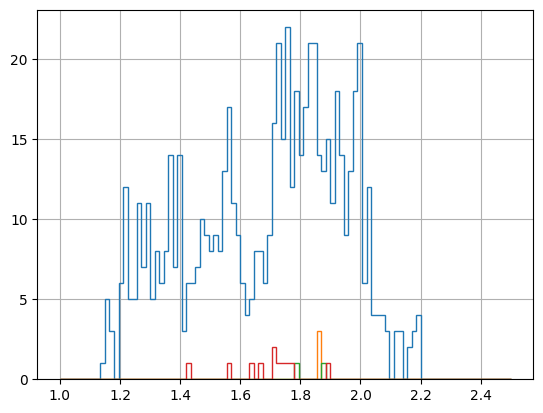

In [10]:
# With 20 input files
print(len(full_df[full_df['fFlagMcMatchRec'].abs() == 0]['fM']))
print(len(full_df[full_df['fFlagMcMatchRec'].abs() == 1]['fM']))
print(len(full_df[full_df['fFlagMcMatchRec'].abs() == 2]['fM']))
print(len(full_df[full_df['fFlagMcMatchRec'].abs() == 4]['fM']))

full_df.query('abs(fFlagMcMatchRec) == 0')['fM'].hist(bins=100, range=(1, 2.5), histtype='step', label='fFlagMcMatchRec == 1')
full_df.query('abs(fFlagMcMatchRec) == 1')['fM'].hist(bins=100, range=(1, 2.5), histtype='step', label='fFlagMcMatchRec == 4')
full_df.query('abs(fFlagMcMatchRec) == 2')['fM'].hist(bins=100, range=(1, 2.5), histtype='step', label='fFlagMcMatchRec == 2')
full_df.query('abs(fFlagMcMatchRec) == 4')['fM'].hist(bins=100, range=(1, 2.5), histtype='step', label='fFlagMcMatchRec == 4')

In [10]:
unique_values = full_df['fCentrality'].unique()
print("Unique values in fCentrality:", unique_values)

Unique values in fCentrality: [-1.]


Plotting fChi2PCA
Plotting fDecayLength
Plotting fDecayLengthXY
Plotting fDecayLengthNormalised
Plotting fDecayLengthXYNormalised
Plotting fPtProng0
Plotting fPtProng1
Plotting fPtProng2
Plotting fImpactParameter0
Plotting fImpactParameter1


/tmp/ipykernel_946866/2140374827.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


Plotting fImpactParameter2
Plotting fImpactParameterZ0
Plotting fImpactParameterZ1
Plotting fImpactParameterZ2
Plotting fNSigTpcPi0
Plotting fNSigTpcKa0
Plotting fNSigTofPi0
Plotting fNSigTofKa0
Plotting fNSigTpcTofPi0
Plotting fNSigTpcTofKa0
Plotting fNSigTpcPi1
Plotting fNSigTpcKa1
Plotting fNSigTofPi1
Plotting fNSigTofKa1
Plotting fNSigTpcTofPi1
Plotting fNSigTpcTofKa1
Plotting fNSigTpcPi2
Plotting fNSigTpcKa2
Plotting fNSigTofPi2
Plotting fNSigTofKa2
Plotting fNSigTpcTofPi2
Plotting fNSigTpcTofKa2
Plotting fCandidateSelFlag
Plotting fM
Plotting fPt
Plotting fCpa
Plotting fCpaXY
Plotting fMaxNormalisedDeltaIP
Plotting fEta
Plotting fPhi
Plotting fY
Plotting fCentrality
Plotting fFlagMcMatchRec
Plotting fOriginMcRec
Plotting fFlagMcDecayChanRec


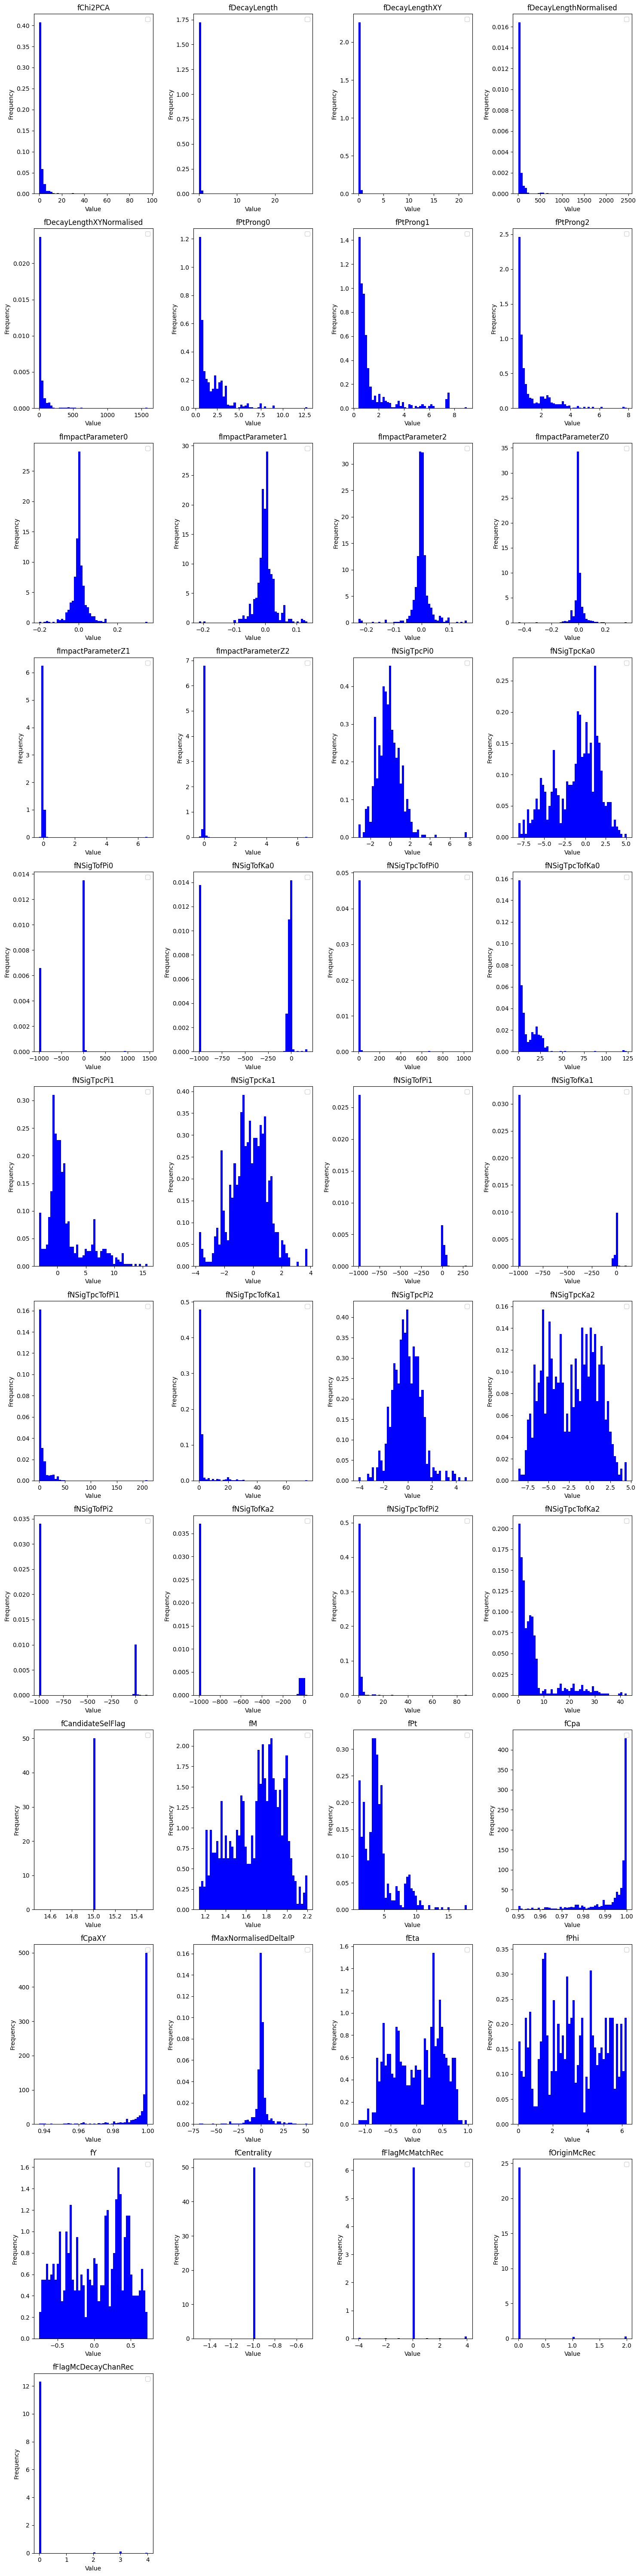

In [11]:
n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    print(f"Plotting {column}")
    axes[i].hist(full_df[column], bins=50, color='blue', density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<Axes: >

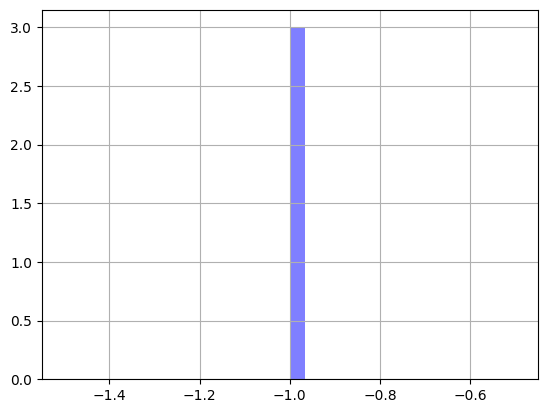

: 

: 

In [ ]:
full_df['fCentrality'].hist(bins=30, color='blue', alpha=0.5, label='Matched')